# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with the files in the `/data` directory on this server.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/data/bhmclr_drg.xlsx', sheet_name='Sheet1', skiprows=3)

In [2]:
data.shape

(3864, 19)

In [3]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [4]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8ce6d1978>,
      dtype=object)

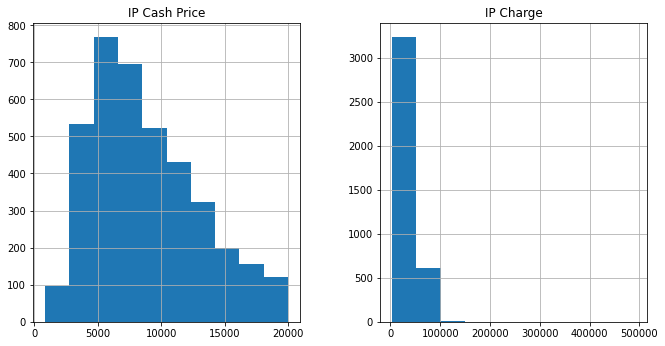

In [5]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8ce74bac8>,
      dtype=object)

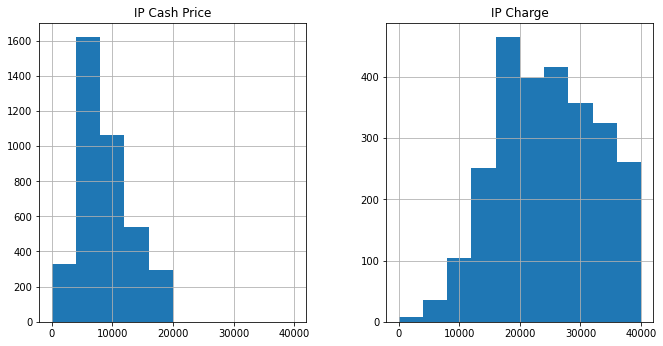

In [6]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [7]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:
In The IP cash price majority values are close to 5000.
The cash price distribution of IP is almost symmetrical.
for IP charges most values are between 15,000 and 20,000 and the graph seems to be skwed to the left.
The maximum and minimum values of IP cash prices are 5000 and 15000 respectively. whereas IP charge price maximum and minimum values are 15000 and 40000 respectively.



---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

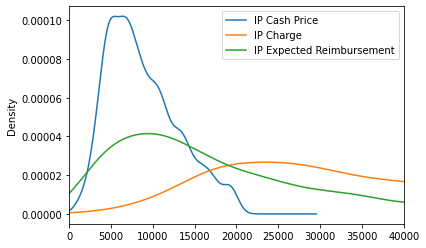

In [8]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

The amount we need to pay without insurance is around 5000 to 10000.
The maximum amount for which the hospital can submit a bill to an insurance company is around 10000.
The expected reimbursement amount that hospital believes it is contracted to receive in payment from the insurance company is between 5000 to 10000.


---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [9]:
data['Payer'].value_counts()

ARKANSAS TOTAL CARE [40700]          650
ALLWELL [15100]                      650
MULTIPLAN                            641
AETNA [65000]                        641
HEALTHSCOPE [95700]                  641
AR BLUE CROSS BLUE SHIELD [25001]    641
Name: Payer, dtype: int64

In [10]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        AxesSubplot(0.125,0.125;0.775x0.755)
ALLWELL [15100]                      AxesSubplot(0.125,0.125;0.775x0.755)
AR BLUE CROSS BLUE SHIELD [25001]    AxesSubplot(0.125,0.125;0.775x0.755)
ARKANSAS TOTAL CARE [40700]          AxesSubplot(0.125,0.125;0.775x0.755)
HEALTHSCOPE [95700]                  AxesSubplot(0.125,0.125;0.775x0.755)
MULTIPLAN                            AxesSubplot(0.125,0.125;0.775x0.755)
Name: IP Expected Reimbursement, dtype: object

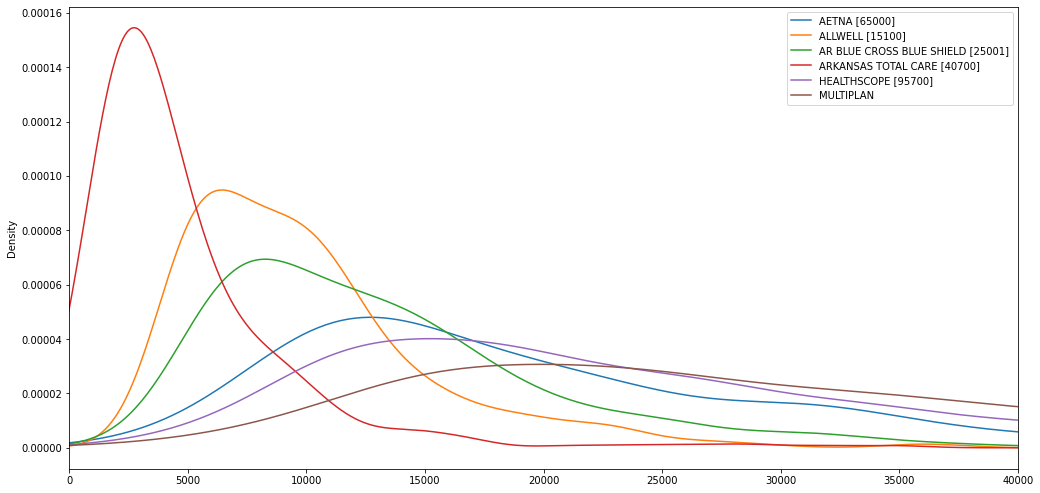

In [11]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:

Plans have a strong rightward bias. The mean is bigger than the median, going by the pattern. Except for a few outliers to the right, the data is more concentrated at the lower costs.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

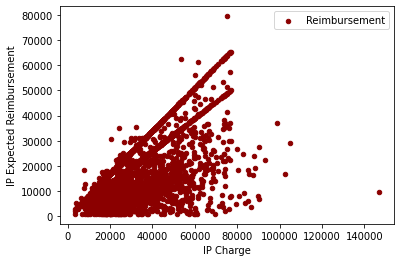

In [12]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

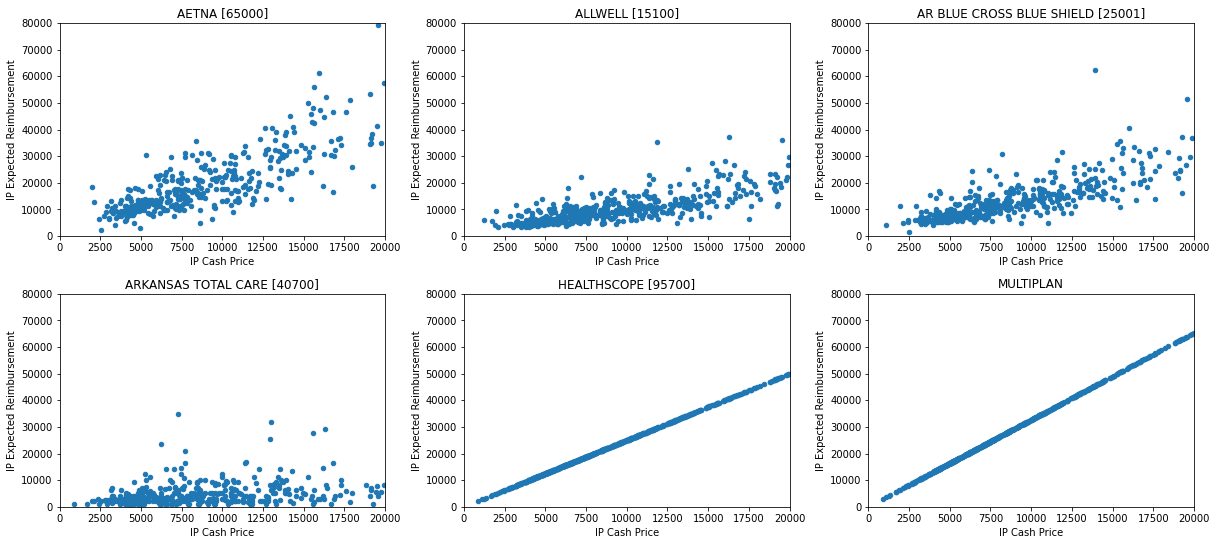

In [13]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

For healthscope and multiplan plans, there is a significant linear positive association between cash prices and insurance paid prices. Although modest for Aetna, Allwell, and AR Blue Cross Plans, there is a strong association between prices paid with cash and prices paid by insurance. For the Arkansas plan, there appears to be no relationship between cash pricing and insurance paid prices.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [5]:
# Your code here to load data...
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('patients.csv')

In [3]:
data.shape

(1171, 25)

In [7]:
data.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [14]:
data.head(100)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,5/25/1989,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,11/14/1983,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,6/2/1992,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,5/27/1978,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,10/18/1996,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0c5aa52a-3b1d-4289-af16-29f7a2d07fec,6/24/1984,NaN,999-82-1441,S99919484,X25592388X,Mrs.,Elvira561,Navarro863,NaN,...,Santiago de los Caballeros Santiago DO,451 Buckridge Harbor,Attleboro,Massachusetts,Bristol County,NaN,41.845866,-71.331787,793569.90,8882.40
96,2a88cb57-86fa-4259-93bf-3956e91b07f4,12/23/2017,NaN,999-28-4976,NaN,NaN,NaN,Mateo562,Palacios784,NaN,...,Santiago Santiago Province CL,841 McGlynn Knoll Suite 67,Taunton,Massachusetts,Bristol County,2780.0,41.959978,-71.014164,51490.40,1457.40
97,e061409e-4b85-4ec1-b1f7-02677d51f763,9/11/1997,NaN,999-32-2366,S99995098,X50396137X,Ms.,Tabetha269,O'Hara248,NaN,...,Auburn Massachusetts US,1080 Sawayn Gateway Suite 9,Framingham,Massachusetts,Middlesex County,1701.0,42.322482,-71.400326,548793.20,9322.69
98,d3f08bb8-e79f-4529-a37a-8aebdfbffe6a,3/22/2020,NaN,999-65-9391,NaN,NaN,NaN,Manuela585,Lozada73,NaN,...,La Paz Baja California MX,570 Gislason Row Suite 32,Boston,Massachusetts,Suffolk County,2136.0,42.400135,-71.040075,5400.00,258.32


### Observations #1

_Double-click this text and then edit it to put in your observations_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf012ca710>,
      dtype=object)

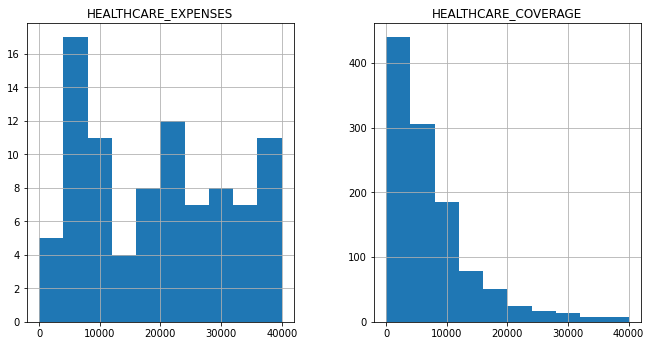

In [25]:
data[['HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE']].hist(range=[0,40000], figsize=(11,5.5))

### Observations #2

_Double-click this text and then edit it to put in your observations_

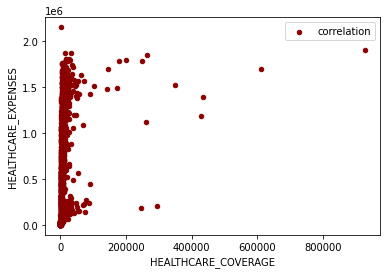

In [26]:
data.plot.scatter(y='HEALTHCARE_EXPENSES', x='HEALTHCARE_COVERAGE', color='DarkRed', label='correlation')

In [ ]:
The observations seen here is that there is no significant correlation between healthcare coverage and health care expenses. 
The health care expenses are quite higher than the health care coverage provided irrespective of the age, gender, race and ethinicity.



---



## Submitting Your Work

As usual, submit your work using the git command line